In [14]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [15]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [16]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [17]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [21]:
print(df_market_data.columns)

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')


In [22]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
numerical_cols = df_market_data.select_dtypes(include=['float64', 'int64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data using the scaler
scaled_data = scaler.fit_transform(df_market_data[numerical_cols])

In [23]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=numerical_cols)

# Copy the crypto names from the original DataFrame


# Set the coin_id column as index
# Access the 'coin_id' from the index and add it as a column
df_scaled['coin_id'] = df_market_data.index

# Set the 'coin_id' column as the index
df_scaled.set_index('coin_id', inplace=True)

# Display the scaled DataFrame
df_scaled.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [24]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Display the k-values list
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [25]:
# Create an empty list to store the inertia values

inertia_values = []
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in range(1, 12):  # Iterates from 1 to 11
    # Create a KMeans model with n_clusters = k
    model = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the scaled data (df_scaled)
    model.fit(df_scaled)
    
    # Append the inertia value to the inertia_values list
    inertia_values.append(model.inertia_)

# Display the inertia values
print(inertia_values)

C:\Users\jtran\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jtran\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jtran\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jtran\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

[286.99999999999994, 212.1233420748626, 170.19357087970297, 79.02243535120975, 71.0979135124442, 66.1088267804475, 54.488123156241166, 43.22469266658042, 32.860884471226804, 28.404884636873092, 24.116198421409194]


In [26]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': list(range(1, 12)),  # k-values from 1 to 11
    'inertia': inertia_values  # inertia values computed earlier
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
print(df_elbow)

     k     inertia
0    1  287.000000
1    2  212.123342
2    3  170.193571
3    4   79.022435
4    5   71.097914
5    6   66.108827
6    7   54.488123
7    8   43.224693
8    9   32.860884
9   10   28.404885
10  11   24.116198


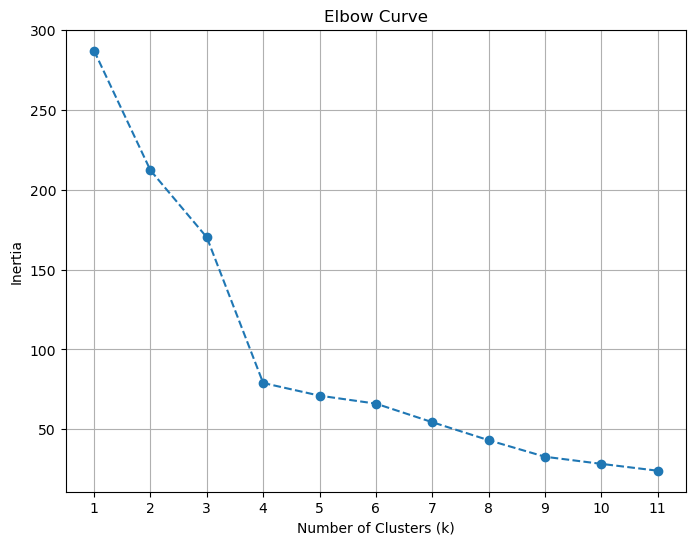

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o', linestyle='--')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 12))
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [30]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=42)

In [31]:
# Fit the K-Means model using the scaled DataFrame
kmeans.fit(df_scaled)

C:\Users\jtran\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [32]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
df_scaled['cluster'] = kmeans.labels_

# Print the resulting array of cluster values.
df_scaled.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,0
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,0
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,0
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,0


In [38]:
# Create a copy of the scaled DataFrame
df_scaled_copy = df_scaled.copy()

In [39]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters


# Display the copy of the scaled DataFrame with the predicted clusters
df_scaled_copy.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,0
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,0
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,0
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,0


In [40]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
import hvplot.pandas

# Create a scatter plot with hvPlot
scatter_plot = df_scaled_copy.hvplot.scatter(
    x="price_change_percentage_24h",  # x-axis
    y="price_change_percentage_7d",   # y-axis
    c="cluster",             # Color by predicted cluster
    hover_cols=["coin_id"],            # Hover over to show the crypto name
    title="Crypto Price Change vs. Clusters",
    height=400,                        # Height of the plot
    width=800                          # Width of the plot
)

# Display the plot
scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [41]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

# Display the PCA model
print(pca)

PCA(n_components=3)


In [42]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_data = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2', 'PCA3'])
# View the scaled PCA data
df_pca.head(10)

,PCA1,PCA2,PCA3
0,-1.585139,0.134394,0.545621
1,-1.322581,0.054494,1.115709
2,0.266335,-0.536409,-0.796946
3,0.257225,-0.592013,-0.646529
4,-2.952250,0.422372,1.267894
5,-1.975484,0.528219,0.670145
6,-1.671906,0.178423,2.718598
7,-1.539740,0.324517,1.497226
8,-1.347533,-0.132837,0.791063
9,0.040698,-0.802083,-0.465562


In [43]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_

# Display the explained variance for each principal component
print(f"Explained Variance for PCA1: {explained_variance[0]:.4f}")
print(f"Explained Variance for PCA2: {explained_variance[1]:.4f}")
print(f"Explained Variance for PCA3: {explained_variance[2]:.4f}")

# Optionally, you can also display the total explained variance
total_explained_variance = explained_variance.sum()
print(f"Total Explained Variance: {total_explained_variance:.4f}")

Explained Variance for PCA1: 0.3701
Explained Variance for PCA2: 0.3232
Explained Variance for PCA3: 0.1912
Total Explained Variance: 0.8844


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.8844

In [44]:
# Create a new DataFrame with the PCA data
df_pca_final = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2', 'PCA3'])

# Copy the 'coin_id' column from the original scaled DataFrame
df_pca_final['coin_id'] = df_scaled.index

# Set the 'coin_id' column as the index
df_pca_final.set_index('coin_id', inplace=True)

# Display the scaled PCA DataFrame
df_pca_final.head(10)

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-1.585139,0.134394,0.545621
ethereum,-1.322581,0.054494,1.115709
tether,0.266335,-0.536409,-0.796946
ripple,0.257225,-0.592013,-0.646529
bitcoin-cash,-2.952250,0.422372,1.267894
binancecoin,-1.975484,0.528219,0.670145
chainlink,-1.671906,0.178423,2.718598
cardano,-1.539740,0.324517,1.497226
litecoin,-1.347533,-0.132837,0.791063


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [45]:
# Create a list with the number of k-values from 1 to 11
inertia_values_pca = []

In [46]:
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in range(1, 12):
    # Initialize the KMeans model with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the KMeans model to the scaled PCA data
    kmeans.fit(df_pca_final)
    
    # Append the inertia (sum of squared distances to closest cluster center) to the list
    inertia_values_pca.append(kmeans.inertia_)

C:\Users\jtran\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jtran\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jtran\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jtran\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

In [23]:
# Create a dictionary with the data to plot the Elbow curve

# Create a DataFrame with the data to plot the Elbow curve


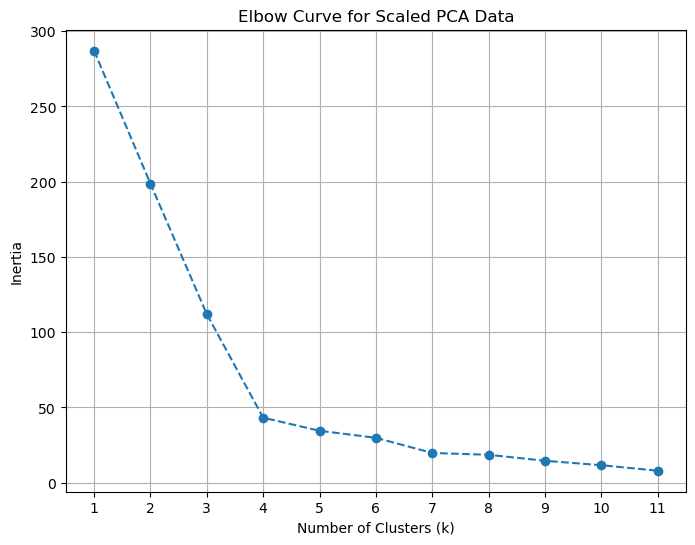

In [48]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(range(1, 12), inertia_values_pca, marker='o', linestyle='--')
plt.title('Elbow Curve for Scaled PCA Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 12))
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** it does not differ

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [49]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=42)

In [50]:
# Fit the K-Means model using the PCA data
kmeans.fit(df_pca_final)

C:\Users\jtran\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [51]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame

df_pca_final['predicted_cluster'] = kmeans.labels_
# Print the resulting array of cluster values.
df_pca_final.head(10)

,PCA1,PCA2,PCA3,predicted_cluster
coin_id,,,,
bitcoin,-1.585139,0.134394,0.545621,0
ethereum,-1.322581,0.054494,1.115709,0
tether,0.266335,-0.536409,-0.796946,1
ripple,0.257225,-0.592013,-0.646529,1
bitcoin-cash,-2.952250,0.422372,1.267894,0
binancecoin,-1.975484,0.528219,0.670145,0
chainlink,-1.671906,0.178423,2.718598,0
cardano,-1.539740,0.324517,1.497226,0
litecoin,-1.347533,-0.132837,0.791063,0


In [28]:
# Create a copy of the scaled PCA DataFrame


# Add a new column to the copy of the PCA DataFrame with the predicted clusters


# Display the copy of the scaled PCA DataFrame


In [53]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
scatter_plot = df_pca_final.hvplot.scatter(
    x='PCA1',  # Use the first principal component for x-axis
    y='PCA2',  # Use the second principal component for y-axis
    c='predicted_cluster',  # Color the points by their predicted cluster
    hover_cols=['coin_id'],  # Show the cryptocurrency name in hover
    title='PCA Clustering of Cryptocurrencies',
    height=400,  # Set the height of the plot
    width=800    # Set the width of the plot
)

# Display the plot
scatter_plot

:Scatter   [PCA1]   (PCA2,predicted_cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

C:\Users\jtran\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jtran\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jtran\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jtran\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

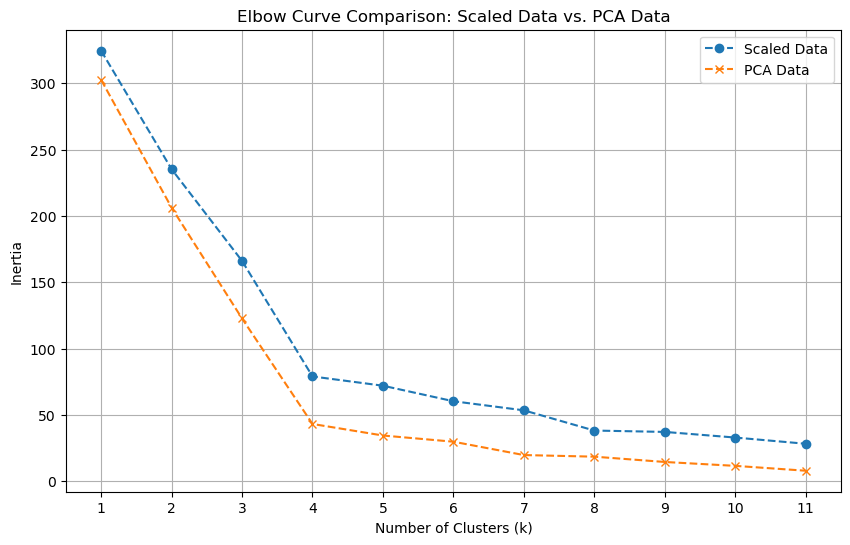

In [54]:
# Composite plot to contrast the Elbow curves
# Elbow Curve for original scaled data
inertia_values_scaled = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia_values_scaled.append(kmeans.inertia_)

# Elbow Curve for PCA-reduced data
inertia_values_pca = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca_final)
    inertia_values_pca.append(kmeans.inertia_)

# Plot both Elbow curves on the same plot
plt.figure(figsize=(10, 6))

# Plot for original scaled data
plt.plot(range(1, 12), inertia_values_scaled, marker='o', linestyle='--', label='Scaled Data')

# Plot for PCA-reduced data
plt.plot(range(1, 12), inertia_values_pca, marker='x', linestyle='--', label='PCA Data')

# Add labels and title
plt.title('Elbow Curve Comparison: Scaled Data vs. PCA Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 12))
plt.legend()
plt.grid(True)
plt.show()

In [59]:
# Composite plot to contrast the clusters

# Scatter plot for clusters in the original scaled data
scatter_plot = df_scaled_copy.hvplot.scatter(
    x="price_change_percentage_24h",  # x-axis
    y="price_change_percentage_7d",   # y-axis
    c="cluster",             # Color by predicted cluster
    hover_cols=["coin_id"],            # Hover over to show the crypto name
    title="Crypto Price Change vs. Clusters",
    height=400,                        # Height of the plot
    width=800                          # Width of the plot
)


# Scatter plot for clusters in the PCA-reduced data
scatter_pca = df_pca_final.hvplot.scatter(
    x='PCA1', 
    y='PCA2', 
    c='predicted_cluster', 
    hover_cols=['coin_id'], 
    title='Clusters in PCA-Reduced Data',
    height=400, 
    width=800
)

# Show the plots together
scatter_plot + scatter_pca


:Layout
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster,coin_id)
   .Scatter.II :Scatter   [PCA1]   (PCA2,predicted_cluster,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** The clusters in the PCA-reduced data are much more condensed while the clusters are more spread out. There are more outliers in the PCA reduced Data but it's possible that it looks as such since the contrast in condensed clusters makes it appear further out.